In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
customer=pd.read_csv("Churn_Modelling.csv")

In [4]:
customer.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
customer.shape

(10000, 14)

In [6]:
customer.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
customer.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [8]:
customer.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [9]:
customer.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
customer.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
customer.duplicated().any()

False

In [12]:
cat_colu=customer.select_dtypes(include=['object']).columns.tolist()
num_colu=customer.select_dtypes(exclude=['object']).columns.tolist()     

In [13]:
cat_colu

['Surname', 'Geography', 'Gender']

In [14]:
num_colu

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

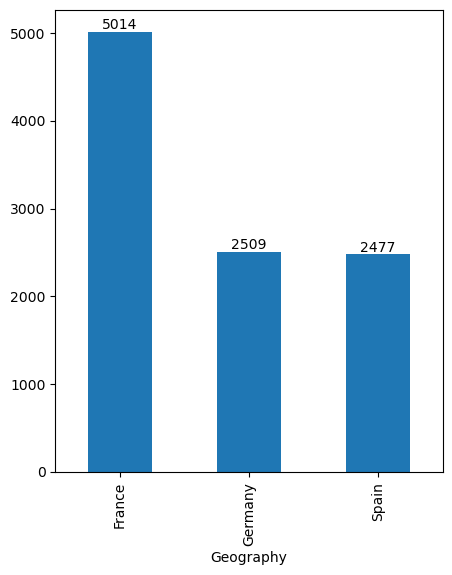

In [15]:
plt.figure(figsize=(5,6))
ax = customer['Geography'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

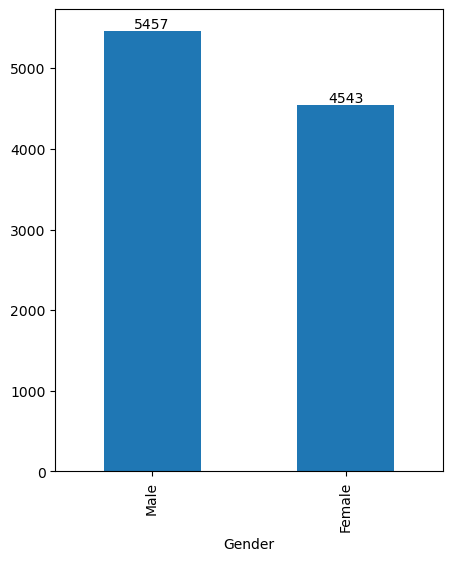

In [16]:
plt.figure(figsize=(5,6))
ax = customer['Gender'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

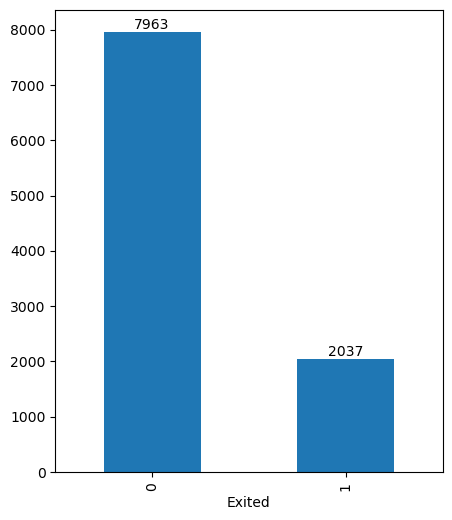

In [17]:
plt.figure(figsize=(5,6))
ax = customer['Exited'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [18]:
num_columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
customer.groupby('Exited')[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].mean().T

Exited,0,1
CreditScore,651.853196,645.351497
Age,37.408389,44.837997
Tenure,5.033279,4.932744
Balance,72745.296779,91108.539337
NumOfProducts,1.544267,1.475209
EstimatedSalary,99738.391772,101465.677531


In [19]:
customer.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


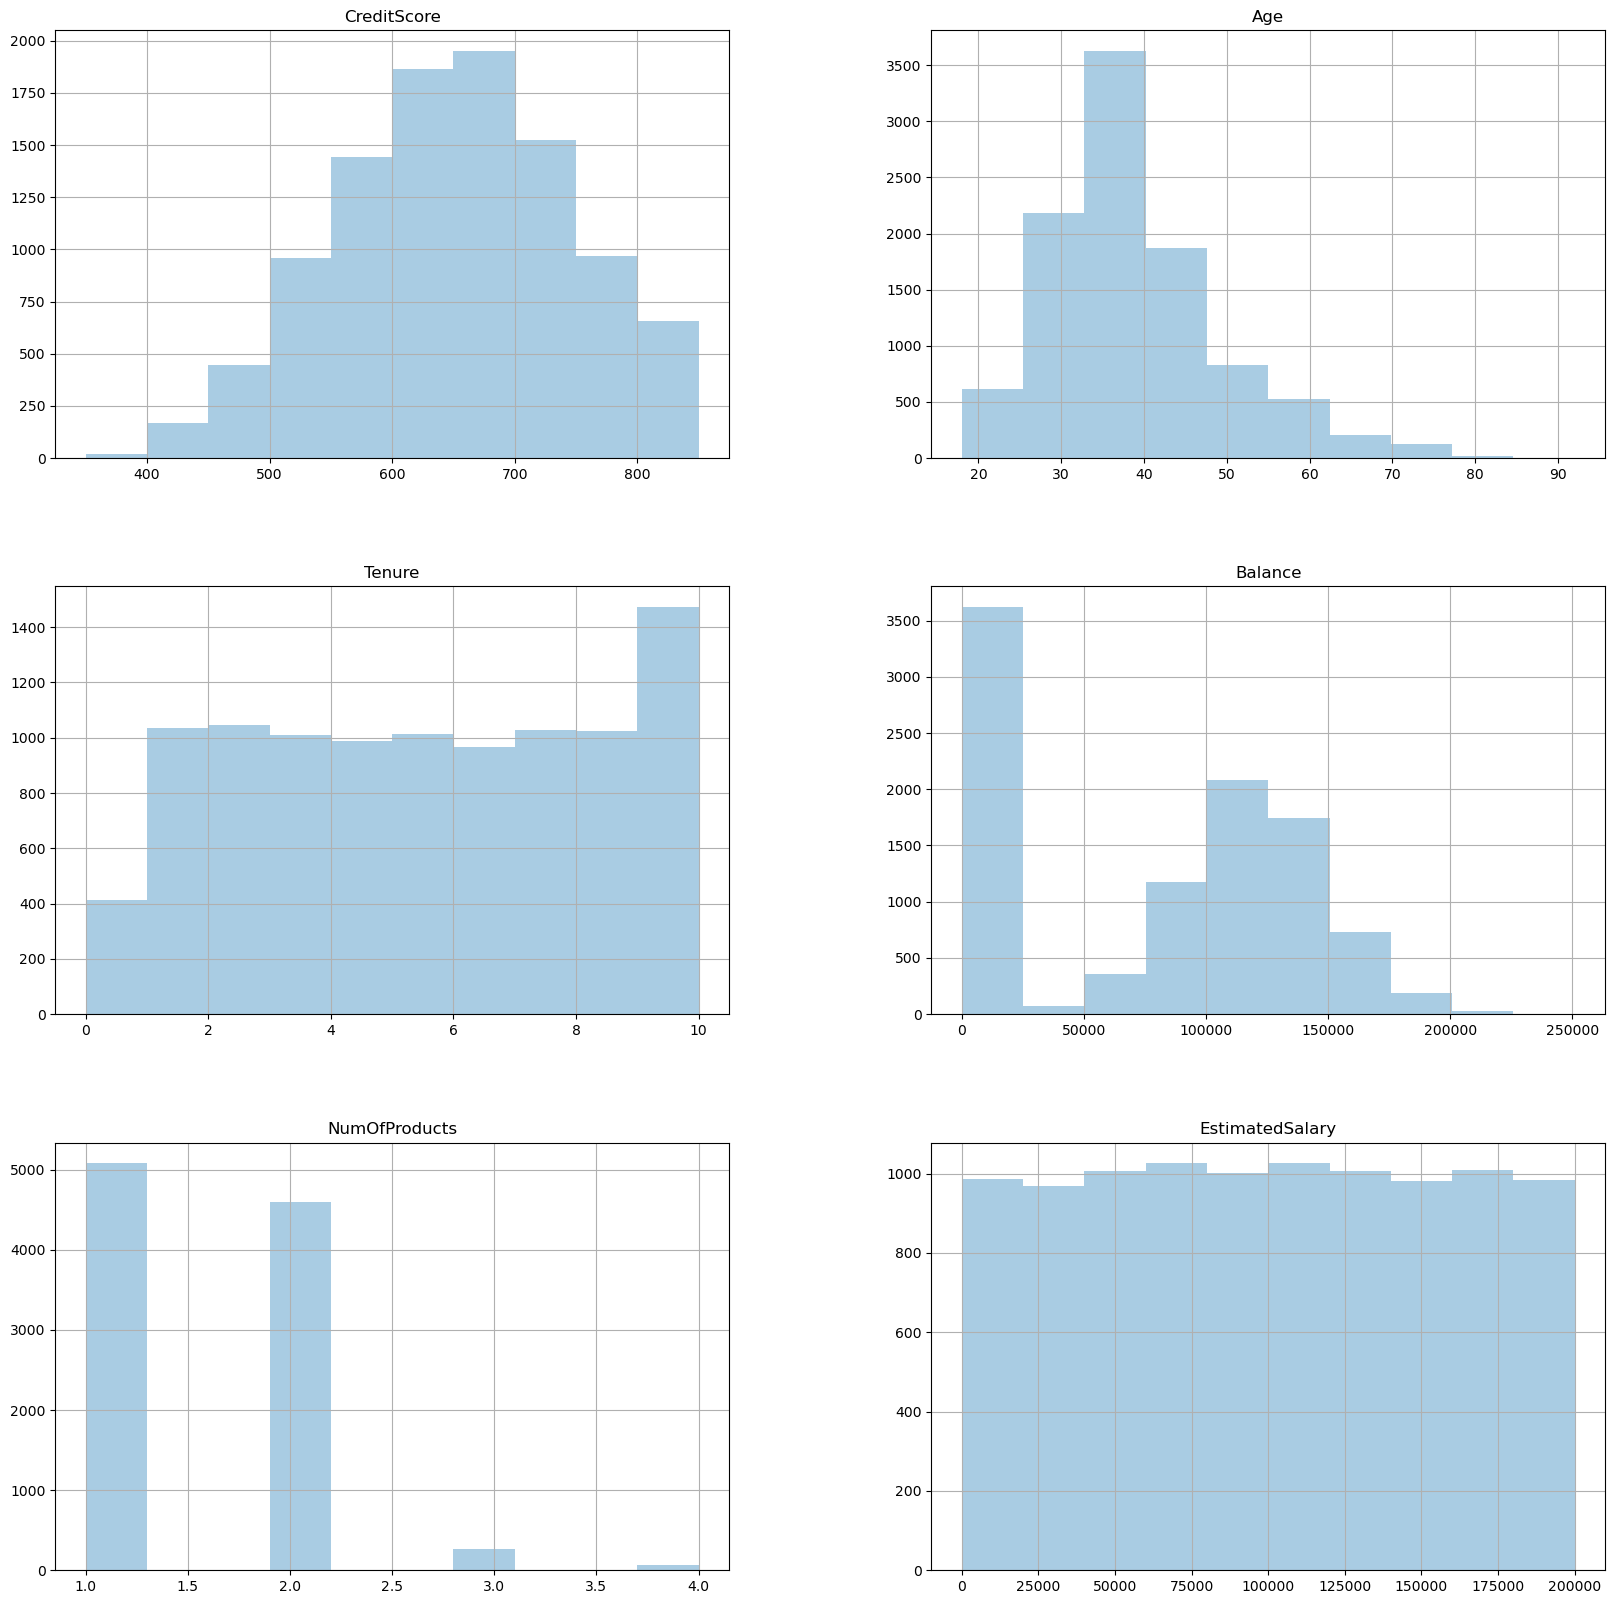

In [20]:
num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_hist_plot = customer[num_columns].hist(figsize=(20, 20), color='#A9CCE3')
plt.show()

In [21]:
x= customer.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = customer['Exited']

In [22]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Encoding categorical Data

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
x['Gender'] = le.fit_transform(x['Gender'])
cate_code = dict(zip(le.classes_, le.transform(le.classes_)))
cate_code

{'Female': 0, 'Male': 1}

In [26]:
x['Geography'] = le.fit_transform(x['Geography'])
cate_code = dict(zip(le.classes_, le.transform(le.classes_)))
cate_code

{'France': 0, 'Germany': 1, 'Spain': 2}

### Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33, random_state = 42)
x_train.shape, x_test.shape

((6700, 10), (3300, 10))

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
x_test

array([[-0.58071682,  0.30112053,  0.9089063 , ..., -1.54618507,
        -1.03555714, -1.02616335],
       [-0.29994111, -0.90192513,  0.9089063 , ...,  0.64675311,
         0.96566376,  0.78471844],
       [-0.52872132,  1.5041662 , -1.10022343, ...,  0.64675311,
        -1.03555714, -0.73575756],
       ...,
       [-0.65351053, -0.90192513, -1.10022343, ...,  0.64675311,
        -1.03555714,  0.81656849],
       [-2.22377473, -0.90192513,  0.9089063 , ..., -1.54618507,
         0.96566376, -0.89395007],
       [ 0.55278515,  0.30112053, -1.10022343, ..., -1.54618507,
        -1.03555714, -0.42439064]])

### Building the ANN

In [30]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the secound hidden layer

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [35]:
ann.fit(x_train, y_train, batch_size = 250, epochs=50)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2548 - loss: 0.8941
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3653 - loss: 0.7781
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5110 - loss: 0.7029
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6962 - loss: 0.6401
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7816 - loss: 0.5960
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7897 - loss: 0.5611
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7917 - loss: 0.5354
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7889 - loss: 0.5250
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7859 - loss: 0.5178
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7873 - loss: 0.5103
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7973 - loss: 0.4839
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7860 - 

In [38]:
cs = int(input("Enter the Credit Score = "))
geo = int(input("Enter the Geography = "))
gender = int(input("Enter the Genter = "))
age = int(input("Enter the Age = "))
tenure = int(input("Enter the Tenure = "))
balance = int(input("Enter the Balance = "))
prod = int(input("Enter the Number of Products = "))
cc = int(input("Credit Card(yes/no = "))
am = int(input("Active Member(yes/no = "))
Salary = int(input("Enter the Estimated Salary = "))

Enter the Credit Score =  502
Enter the Geography =  0
Enter the Genter =  0
Enter the Age =  42
Enter the Tenure =  8
Enter the Balance =  159660
Enter the Number of Products =  1
Credit Card(yes/no =  1
Active Member(yes/no =  1
Enter the Estimated Salary =  113931


In [39]:
# input_data = [cs, geo, gender, age, tenure, balance, prod, cc, am, Salary]

input_data= [502,0,0,42,8,159660.80,1,1,1,113931.57]
# input_data = [730,0,0,47,7,0.0,1,1,0,33373]
scaled_data = sc.transform([input_data])
prediction = ann.predict(scaled_data)
print(prediction)
pred=prediction > 0.5
if pred[0][0] == False:
    print("Customer stays in the bank")
else:
    print("Customer Leaves the bank")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[0.22937727]]
Customer stays in the bank


### Predicting the Test set results

In [40]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
y_prediction = [re[0] for re in y_pred]


104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Making the Confution Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.8333333333333334

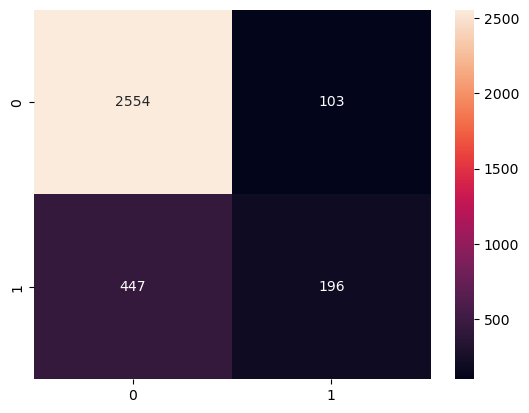

In [42]:
sns.heatmap(cm, annot = True, fmt='g')
plt.show()